# Anime Recommendation System

### Load datastet

In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
data = pd.read_csv('anime.csv')
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
data.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

### Data Preprocessing

In [6]:
data['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [7]:
data[data['episodes'] == 'Unknown']

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400
...,...,...,...,...,...,...,...
12265,34361,Kyonyuu Reijou MC Gakuen,Hentai,OVA,Unknown,NaN,205
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [8]:
data['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [9]:
data.loc[(data['type'] == 'TV') & (data['episodes'] == 'Unknown'),"episodes"] = 1
data.loc[(data['type'] == 'OVA') & (data['episodes'] == 'Unknown'),"episodes"] = 1
data.loc[(data['type'] == 'Movie') & (data['episodes'] == 'Unknown'),"episodes"] = 1

In [10]:
data[data['episodes'] == 'Unknown']

,anime_id,name,genre,type,episodes,rating,members
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400
1928,32410,Dimension W: W no Tobira Online,"Sci-Fi, Seinen",Special,Unknown,7.40,4799
2368,34178,Inazuma Eleven: Outer Code,Sports,ONA,Unknown,7.28,1072
5655,7505,Knyacki!,"Comedy, Drama, Fantasy, Kids",ONA,Unknown,6.38,242
5995,32932,Choujuu Giga,Romance,ONA,Unknown,6.28,466
...,...,...,...,...,...,...,...
11070,32032,Seikaisuru Kado,NaN,NaN,Unknown,NaN,1797
11101,33478,UQ Holder!,"Action, Fantasy, Magic, Sci-Fi, Shounen",NaN,Unknown,NaN,2341
11105,34022,Whistle! (ONA),"School, Shounen, Sports",ONA,Unknown,NaN,381
12252,34382,Citrus,"Drama, Romance, School, Yuri",NaN,Unknown,NaN,2459


In [11]:
known_animes = {"Naruto Shippuuden":500, "One Piece":784,"Detective Conan":854, "Dragon Ball Super":86,
                "Crayon Shin chan":942, "Yu Gi Oh Arc V":148,"Shingeki no Kyojin Season 2":25,
                "Boku no Hero Academia 2nd Season":25,"Little Witch Academia TV":25}

In [12]:
for key,values in known_animes.items():
    data.loc[data['name'] == key, "episodes"] = values

In [13]:
data[data['episodes'] == 'Unknown']

,anime_id,name,genre,type,episodes,rating,members
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400
1928,32410,Dimension W: W no Tobira Online,"Sci-Fi, Seinen",Special,Unknown,7.40,4799
2368,34178,Inazuma Eleven: Outer Code,Sports,ONA,Unknown,7.28,1072
5655,7505,Knyacki!,"Comedy, Drama, Fantasy, Kids",ONA,Unknown,6.38,242
5995,32932,Choujuu Giga,Romance,ONA,Unknown,6.28,466
...,...,...,...,...,...,...,...
11070,32032,Seikaisuru Kado,NaN,NaN,Unknown,NaN,1797
11101,33478,UQ Holder!,"Action, Fantasy, Magic, Sci-Fi, Shounen",NaN,Unknown,NaN,2341
11105,34022,Whistle! (ONA),"School, Shounen, Sports",ONA,Unknown,NaN,381
12252,34382,Citrus,"Drama, Romance, School, Yuri",NaN,Unknown,NaN,2459


In [14]:
data['episodes'] = data['episodes'].apply(lambda x:np.nan if x=="Unknown" else x)
data[data['episodes'] == 'Unknown']
#data

,anime_id,name,genre,type,episodes,rating,members


In [15]:
data.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes     77
rating      230
members       0
dtype: int64

In [16]:
data['episodes'].fillna(data['episodes'].median(),inplace=True)

In [17]:
data.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [18]:
data['rating'].fillna(data['rating'].mean(),inplace=True)

In [19]:
data.isna().sum()

anime_id     0
name         0
genre       62
type        25
episodes     0
rating       0
members      0
dtype: int64

### Type

In [20]:
pd.get_dummies(data[['type']]).head()

,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [21]:
data.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [22]:
data['members'] = data['members'].astype(float)

In [23]:
data.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members     float64
dtype: object

In [24]:
# Scaling

anime_features = pd.concat([data["genre"].str.get_dummies(sep=","),
                            pd.get_dummies(data[["type"]]),
                            data[["rating"]],data[["members"]],data["episodes"]],axis=1)
data["name"] = data["name"].map(lambda name:re.sub('[^A-Za-z0-9]+', " ", name))
anime_features.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,rating,members,episodes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,9.37,200630.0,1
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,9.26,793665.0,64
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.25,114262.0,51
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.17,673572.0,24
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.16,151266.0,51


In [43]:
data["name"]

0                                           Kimi no Na wa 
1                          Fullmetal Alchemist Brotherhood
2                                                 Gintama 
3                                              Steins Gate
4                                             Gintama 039 
                               ...                        
12289          Toushindai My Lover Minami tai Mecha Minami
12290                                          Under World
12291                       Violence Gekiga David no Hoshi
12292    Violence Gekiga Shin David no Hoshi Inma Densetsu
12293                       Yasuji no Pornorama Yacchimae 
Name: name, Length: 12294, dtype: object

## Fitting KNN Model

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
mms = MinMaxScaler()

In [27]:
anime_features = mms.fit_transform(anime_features)

In [28]:
np.round(anime_features,2)

array([[0.  , 0.  , 0.  , ..., 0.92, 0.2 , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.91, 0.78, 0.03],
       [0.  , 0.  , 1.  , ..., 0.91, 0.11, 0.03],
       ...,
       [0.  , 0.  , 0.  , ..., 0.39, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.4 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.45, 0.  , 0.  ]])

## Fit nearest neighbour to data

In [29]:
from sklearn.neighbors import NearestNeighbors

In [58]:
knn = NearestNeighbors(n_neighbors=6,algorithm='ball_tree').fit(anime_features)

In [59]:
distances, indices = knn.kneighbors(anime_features)

In [60]:
indices

array([[    0,   208,  1494,  1959,    60,   894],
       [    1,   200,   268,   101,   795,   290],
       [    2,     4,     9,    12, 10896,     8],
       ...,
       [12291, 12238, 12237, 12236, 12256, 12235],
       [12292, 12231, 12232, 12230, 12229, 12283],
       [12293,  7426,  8279,  7349,  7335,  7498]])

In [61]:
distances

array([[0.00000000e+00, 1.01745852e+00, 1.03825229e+00, 1.03937903e+00,
        1.41715701e+00, 1.43686564e+00],
       [0.00000000e+00, 1.02413628e+00, 1.49532476e+00, 1.51709788e+00,
        1.56764563e+00, 1.58773614e+00],
       [0.00000000e+00, 3.80619318e-02, 4.22966942e-02, 2.35458532e-01,
        3.48886921e-01, 1.41519443e+00],
       ...,
       [0.00000000e+00, 1.66526983e-03, 1.68342197e-03, 6.10251645e-03,
        7.38983683e-03, 7.39065502e-03],
       [0.00000000e+00, 1.20193784e-03, 1.28937218e-03, 2.40126848e-03,
        2.42265612e-03, 3.60197655e-03],
       [0.00000000e+00, 1.00000289e+00, 1.00002594e+00, 1.00002597e+00,
        1.00003531e+00, 1.00005836e+00]])

In [62]:
anime_features.shape

(12294, 91)

### Helper functions

In [63]:
#--Returns index of anime if given full name--#
def get_index_from_name(name):
    return data[data['name']==name].index.tolist()[0]

In [64]:
all_anime_names = list(data.name)
all_anime_names

['Kimi no Na wa ',
 'Fullmetal Alchemist Brotherhood',
 'Gintama ',
 'Steins Gate',
 'Gintama 039 ',
 'Haikyuu Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
 'Hunter x Hunter 2011 ',
 'Ginga Eiyuu Densetsu',
 'Gintama Movie Kanketsu hen Yorozuya yo Eien Nare',
 'Gintama 039 Enchousen',
 'Clannad After Story',
 'Koe no Katachi',
 'Gintama',
 'Code Geass Hangyaku no Lelouch R2',
 'Haikyuu Second Season',
 'Sen to Chihiro no Kamikakushi',
 'Shigatsu wa Kimi no Uso',
 'Mushishi Zoku Shou 2nd Season',
 'Ookami Kodomo no Ame to Yuki',
 'Code Geass Hangyaku no Lelouch',
 'Hajime no Ippo',
 'Rurouni Kenshin Meiji Kenkaku Romantan Tsuioku hen',
 'Cowboy Bebop',
 'One Punch Man',
 'Mononoke Hime',
 'Suzumiya Haruhi no Shoushitsu',
 'Monogatari Series Second Season',
 'Mushishi Zoku Shou',
 'Mushishi',
 'Tengen Toppa Gurren Lagann',
 'Great Teacher Onizuka',
 'Natsume Yuujinchou Go',
 'Hajime no Ippo New Challenger',
 'Mushishi Zoku Shou Suzu no Shizuku',
 'Natsume Yuujinchou Shi',
 'Howl no U

In [65]:
#--Returns index of all animes having substring in their name--#
def get_id_from_partial_name(partial):
    for name in all_anime_names:
        if partial in name:
            print(name,all_anime_names.index(name))

In [66]:
#--Prints top 5 similar animes--#
def print_similar_animes(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(data.loc[id]["name"]+' -------> '+data.loc[id]["genre"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(data.loc[id]["name"]+' -------> '+data.loc[id]["genre"])

In [67]:
get_id_from_partial_name('Fullmetal')

Fullmetal Alchemist Brotherhood 1
Fullmetal Alchemist 200
Fullmetal Alchemist Brotherhood Specials 402
Fullmetal Alchemist The Conqueror of Shamballa 971
Fullmetal Alchemist Brotherhood 4 Koma Theater 1030
Fullmetal Alchemist The Sacred Star of Milos 1558
Fullmetal Alchemist Premium Collection 1742
Fullmetal Alchemist Reflections 1967
Fullmetal Alchemist The Sacred Star of Milos Specials 2397


In [68]:
get_index_from_name('Dragon Ball')

346

In [69]:
print_similar_animes(id=86)

Shingeki no Kyojin Season 2 -------> Action, Drama, Fantasy, Shounen, Super Power
One Piece -------> Action, Adventure, Comedy, Drama, Fantasy, Shounen, Super Power
Shingeki no Kyojin OVA -------> Action, Drama, Fantasy, Shounen, Super Power
Utawarerumono Itsuwari no Kamen -------> Action, Drama, Fantasy
Shingeki no Kyojin Ano Hi Kara -------> Action, Drama, Fantasy, Shounen, Super Power


In [70]:
get_id_from_partial_name('Labyrinth')

Magi The Labyrinth of Magic 268
Doraemon Movie 14 Nobita to Buriki no Labyrinth 2439
Suteki Tantei Labyrinth 3599
Honoo no Labyrinth 5684


In [71]:
print_similar_animes(query='Naruto')

Naruto Shippuuden -------> Action, Comedy, Martial Arts, Shounen, Super Power
Katekyo Hitman Reborn  -------> Action, Comedy, Shounen, Super Power
Bleach -------> Action, Comedy, Shounen, Super Power, Supernatural
Dragon Ball Z -------> Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power
Boku no Hero Academia -------> Action, Comedy, School, Shounen, Super Power


# Visualization

#### Visualizing the average ratings for each type of entertainment

In [63]:
data_new=pd.DataFrame({'mean': data.groupby("type")["rating"].mean()}).reset_index()
data_new

,type,mean
0,Movie,6.321443
1,Music,5.588996
2,ONA,5.652120
3,OVA,6.375996
4,Special,6.523353
5,TV,6.889177


<BarContainer object of 6 artists>

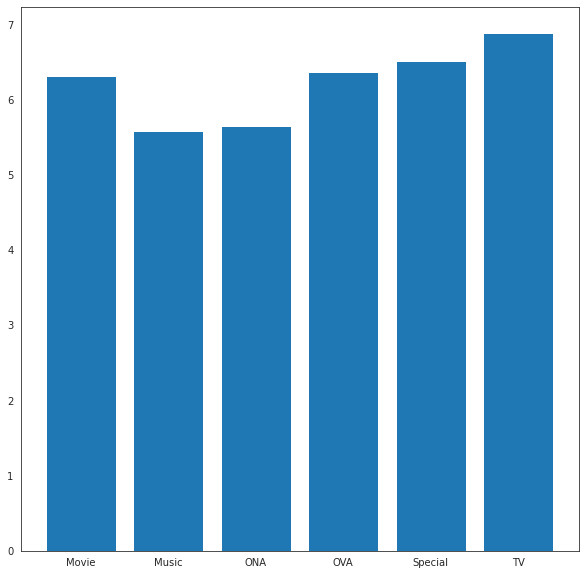

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.bar(data_new["type"], data_new["mean"])

In [49]:
n_by_state = data.groupby("type")["rating"].mean()
n_by_state.head(10)

type
Movie      6.321443
Music      5.588996
ONA        5.652120
OVA        6.375996
Special    6.523353
TV         6.889177
Name: rating, dtype: float64

In [50]:
data_new=pd.DataFrame({'mean' : data.groupby("type")["rating"].mean()}).reset_index()

In [51]:
data_new

,type,mean
0,Movie,6.321443
1,Music,5.588996
2,ONA,5.652120
3,OVA,6.375996
4,Special,6.523353
5,TV,6.889177


#### Plotting no. of animes in each genre

[Text(0, 0.5, 'Genre'), Text(0.5, 0, 'Anime Count')]

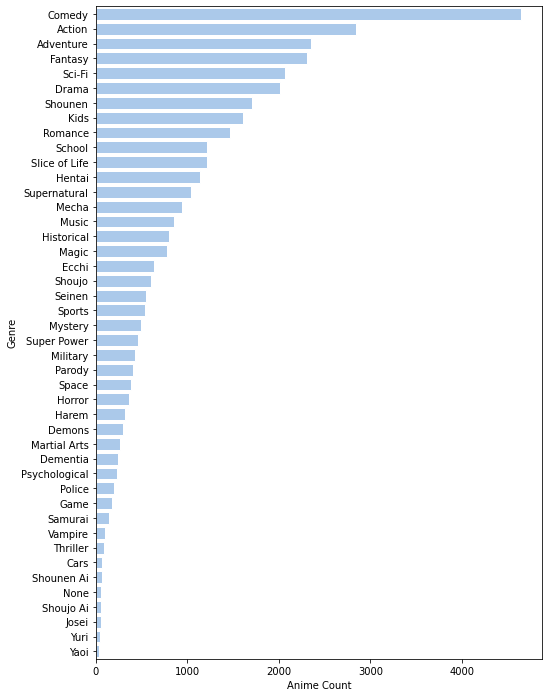

In [53]:
import itertools
import collections

import seaborn as sns

animes = pd.read_csv('anime.csv') # load the data
animes['genre'] = animes['genre'].fillna('None') # filling 'empty' data
animes['genre'] = animes['genre'].apply(lambda x: x.split(', ')) # split genre into list of individual genre

genre_data = itertools.chain(*animes['genre'].values.tolist()) # flatten the list
genre_counter = collections.Counter(genre_data)
genres = pd.DataFrame.from_dict(genre_counter, orient='index').reset_index().rename(columns={'index':'genre', 0:'count'})
genres.sort_values('count', ascending=False, inplace=True)

# Plot genre
f, ax = plt.subplots(figsize=(8, 12))
sns.set_color_codes("pastel")
sns.set_style("white")
sns.barplot(x="count", y="genre", data=genres, color='b')
ax.set(ylabel='Genre',xlabel="Anime Count")

In [54]:
data = data.replace({'Harem': 'Hentai'}, regex=True)
data = data.replace({'Ecchi': 'Hentai'}, regex=True)
data = data.replace({'Shoujo Ai': 'Hentai'}, regex=True)
data = data.replace({'Yaoi': 'Hentai'}, regex=True)
data = data.replace({'Yuri': 'Hentai'}, regex=True)
data = data.replace({'Shounen Ai': 'Hentai'}, regex=True)

data = data.replace({'Demons': 'Vampire'}, regex=True)

data = data.replace({'Supernatural': 'Magic'}, regex=True)
data = data.replace({'Super Power': 'Magic'}, regex=True)
data = data.replace({'Sci-Fi': 'Magic'}, regex=True)

In [55]:
genres = set()
for entry in data['genre']:
    if not type(entry) is str:
        continue
    genres.update(entry.split(", "))
print(genres)
print("Total Genres: " + str(len(genres)))

{'Military', 'Magic', 'Action', 'Horror', 'Samurai', 'Mystery', 'Music', 'Slice of Life', 'Seinen', 'Space', 'Romance', 'Sports', 'Mecha', 'Game', 'Parody', 'Martial Arts', 'Dementia', 'Kids', 'Thriller', 'Shounen', 'Hentai', 'Police', 'Psychological', 'Cars', 'Josei', 'Vampire', 'Adventure', 'Fantasy', 'School', 'Comedy', 'Historical', 'Drama', 'Shoujo'}
Total Genres: 33


genres_count = collections.defaultdict(int)
for entry in data['genre']:
    if not type(entry) is str:
        continue
    seen_already = set()
    for genre in entry.split(", "):
        if genre in seen_already:
            continue
        seen_already.add(genre)
        genres_count[genre] += 1
sorted(genres_count.items(), key=operator.itemgetter(1), reverse=True)

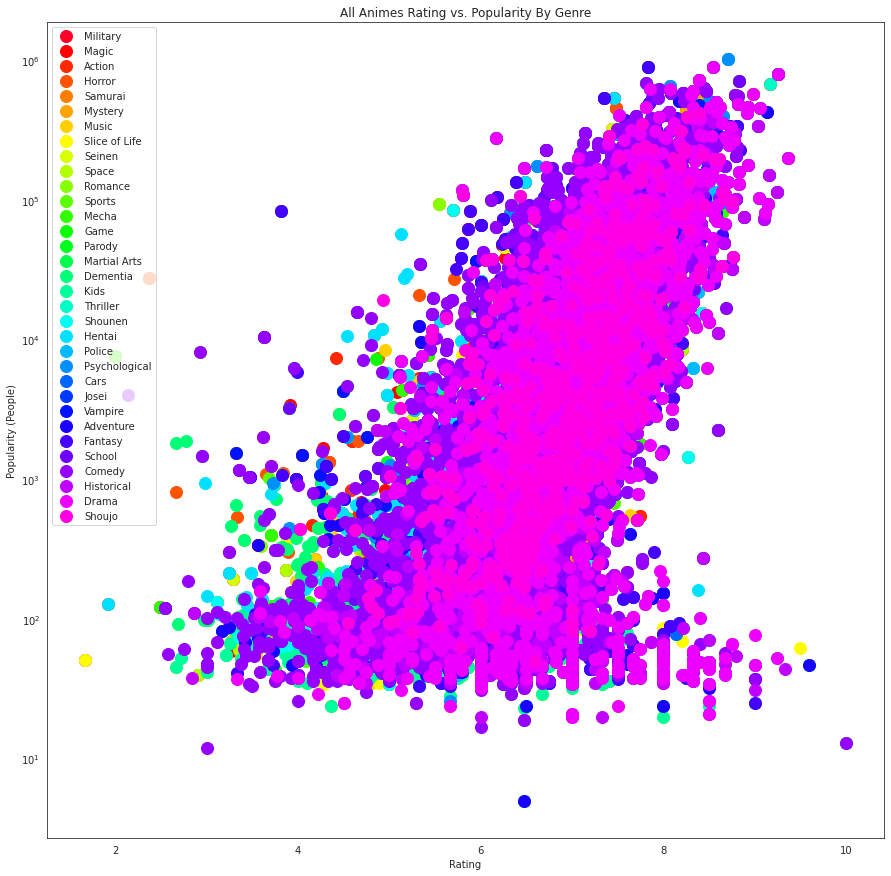

In [57]:

import operator
fig = plt.figure(figsize=(15,15))
ax = plt.gca()
plt.title('All Animes Rating vs. Popularity By Genre')
plt.xlabel('Rating')
plt.ylabel('Popularity (People)')
num_colors = len(genres)
cm = plt.get_cmap('gist_rainbow')
ax.set_prop_cycle('color', [cm(1. * i / num_colors) for i in range(num_colors)])
ax.set_yscale('log')
# For each genre, plot data point if it falls in that category
for genre in genres:
    data_genre = data[data.genre.str.contains(genre) == True]
    ax.plot(data_genre["rating"], data_genre["members"], marker='o', linestyle='', ms=12, label=genre)
ax.legend(numpoints=1, loc='upper left');